In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter
import seaborn as sns

pd.set_option('display.max_columns', 1000)

In [3]:
# plot
def get_plt(data_o, outlier, filter, save):
    data = data_o.copy(deep=True)
    data = data.drop('time', axis=1)
    if outlier:
        data = delete_outliers(data, filter, 'z-score')
    num_col = len(data.columns)
    plt.figure(figsize=(10, 20))
    for i, column in enumerate(data.columns):
        if column != 'time':
            plt.subplot(num_col, 1, i + 1)
            plt.plot(data[column])
            plt.title(column, loc='right', y=0.5)
    if not save:
        plt.show()
    else:
        plt.savefig('/home/weiyichen/桌面/EDA_dist-dushu_20220809.png', bbox_inches= 'tight')
        plt.close()
    return data


# descriptive stat
def get_desc_stat(data_o, outlier, filter, save):
    data = data_o.copy(deep=True)
    data = data.drop('time', axis=1)
    if outlier:
        data = delete_outliers(data, filter, 'z-score')

    data_describe = data.describe()
    index = data_describe.index[1:]
    plt.figure(figsize=(15, 10))
    for i in range(len(data.columns)):
        ax = plt.subplot(3, 3, i + 1)
        ax.set_title(data.columns[i])
        for j in range(len(index)):
            plt.bar(index[j], data_describe.loc[index[j], data.columns[i]])
    if not save:
        plt.show()
    else:
        plt.savefig('/home/weiyichen/桌面/EDA_desc-dushu_20220809.png', bbox_inches= 'tight')
        plt.close()
    return data


def get_box_plot(data_o, outlier, filter, save):
    data = data_o.copy(deep=True)
    data = data.drop('time', axis=1)
    if outlier:
        data = delete_outliers(data, filter, 'z-score')

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(data.columns):
        ax = plt.subplot(3, 3, i + 1)
        ax.set_title(col)
        plt.boxplot(data[col])
    if not save:
        plt.show()
    else:
        plt.savefig('/home/weiyichen/桌面/EDA_box-dushu_20220809.png', bbox_inches= 'tight')
        plt.close()
    return data

In [4]:
def delete_outliers(data_o, filter, method):
    data = data_o.copy(deep=True)
    # delete minus values
    data = data[data > 0].dropna()
    data.reset_index(drop=True, inplace=True)

    if method == 'z-score':
        data_norm = (data - data.mean()) / (data.std())
        data = data[abs(data_norm[:]) <= 3].dropna().reset_index(drop=True)
    elif method == 'boxplot':
        out_index = []
        for col in data.columns:             # 对每一列分别用箱型图进行判断
            Q1 = data[col].quantile(q=0.25)       # 下四分位
            Q3 = data[col].quantile(q=0.75)       # 上四分位
            low_whisker = Q1 - 1.5 * (Q3 - Q1)  # 下边缘
            up_whisker = Q3 + 1.5 * (Q3 - Q1)   # 上边缘

            # 寻找异常点,获得异常点索引值，删除索引值所在行数据
            rule = (data[col] > up_whisker) | (data[col] < low_whisker)
            out = data[col].index[rule]
            out_index += out.tolist()
        data.drop(out_index, inplace=True)

    if filter:
        for attr in data.columns:
            data[attr] = pd.DataFrame(savgol_filter(data[attr], window_length=11, polyorder=6))
    return data

In [5]:
attrs = ['时间', '叶绿素', '电导率', '溶解氧(mg/L)', '藻蛋白', '总溶解固体', '浊度', '温度', 'PH值', '低频水深(m)']
data = pd.read_csv('./datasets/监测数据1/监测数据-独墅-20220809.csv')[attrs]

data.rename(columns={'时间': 'time', '叶绿素': 'Chlo', '电导率': 'Cond',
                     '溶解氧(mg/L)': 'DO', '藻蛋白': 'Phyco',
                     '总溶解固体': 'TDS', '浊度': 'Turb',
                     '温度': 'Temp', 'PH值': 'pH',
                     '低频水深(m)': 'LFWD'}, inplace=True)
data['time'] = pd.to_datetime(data['time'])
data['Phyco'] /= 100
data = data.sort_values('time')
data.reset_index(drop=True, inplace=True)

In [6]:
get_box_plot(data, False, False, True)

,Chlo,Cond,DO,Phyco,TDS,Turb,Temp,pH,LFWD
0,17.26,262.80,6.97,30.6217,149.24,13.11,32.232,8.68,1.429
1,17.56,262.35,6.95,30.6682,148.99,13.09,32.229,8.68,1.460
2,17.51,262.02,6.94,30.4726,148.80,13.14,32.226,8.67,1.490
3,17.35,261.78,6.92,30.2570,148.68,13.13,32.224,8.67,1.480
4,17.44,262.44,6.91,30.4720,149.06,13.08,32.221,8.67,1.519
...,...,...,...,...,...,...,...,...,...
2213,17.26,297.03,10.91,64.4722,166.54,18.40,32.963,9.13,2.539
2214,17.14,297.05,10.91,64.7515,166.56,18.39,32.962,9.13,2.589
2215,17.39,297.07,10.92,64.6297,166.56,18.42,32.964,9.13,2.509
2216,17.32,297.10,10.92,64.6327,166.58,18.30,32.965,9.13,2.599


In [7]:
get_box_plot(data, True, False, True)

,Chlo,Cond,DO,Phyco,TDS,Turb,Temp,pH,LFWD
0,16.32,287.41,8.00,34.2167,162.96,12.59,32.319,8.76,5.010
1,16.33,291.48,8.02,34.3243,165.28,12.56,32.317,8.76,5.059
2,16.39,295.03,8.03,34.6086,167.29,12.56,32.316,8.77,5.110
3,16.42,295.25,8.05,34.7303,167.41,12.54,32.318,8.77,5.030
4,16.60,295.23,8.06,34.9762,167.39,12.59,32.320,8.78,5.050
...,...,...,...,...,...,...,...,...,...
2156,17.26,297.03,10.91,64.4722,166.54,18.40,32.963,9.13,2.539
2157,17.14,297.05,10.91,64.7515,166.56,18.39,32.962,9.13,2.589
2158,17.39,297.07,10.92,64.6297,166.56,18.42,32.964,9.13,2.509
2159,17.32,297.10,10.92,64.6327,166.58,18.30,32.965,9.13,2.599


In [8]:
data_unprocessed = get_plt(data, False, False, True)
get_desc_stat(data, False, False, True)

,Chlo,Cond,DO,Phyco,TDS,Turb,Temp,pH,LFWD
0,17.26,262.80,6.97,30.6217,149.24,13.11,32.232,8.68,1.429
1,17.56,262.35,6.95,30.6682,148.99,13.09,32.229,8.68,1.460
2,17.51,262.02,6.94,30.4726,148.80,13.14,32.226,8.67,1.490
3,17.35,261.78,6.92,30.2570,148.68,13.13,32.224,8.67,1.480
4,17.44,262.44,6.91,30.4720,149.06,13.08,32.221,8.67,1.519
...,...,...,...,...,...,...,...,...,...
2213,17.26,297.03,10.91,64.4722,166.54,18.40,32.963,9.13,2.539
2214,17.14,297.05,10.91,64.7515,166.56,18.39,32.962,9.13,2.589
2215,17.39,297.07,10.92,64.6297,166.56,18.42,32.964,9.13,2.509
2216,17.32,297.10,10.92,64.6327,166.58,18.30,32.965,9.13,2.599


In [66]:
data_unprocessed.describe()

,Chlo,Cond,DO,Phyco,TDS,Turb,Temp,pH,LFWD
count,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000
mean,16.060546,295.822187,9.467187,44.440750,167.462146,14.031641,32.412640,8.922719,3.803730
std,2.654255,3.752747,0.992235,10.470599,2.203010,2.474226,0.341812,0.153519,1.443535
min,7.980000,261.780000,6.880000,21.052400,148.680000,7.560000,31.595000,8.000000,1.159000
25%,14.162500,295.800000,8.900000,40.275750,167.020000,12.530000,32.275250,8.870000,2.500000
50%,16.705000,296.410000,9.290000,42.375700,167.560000,14.265000,32.346000,8.910000,3.490000
75%,17.970000,296.720000,10.400000,49.473400,168.210000,15.370000,32.651000,9.070000,5.099000
max,22.640000,299.300000,11.450000,77.422500,169.900000,23.910000,33.398000,9.150000,7.110000


In [12]:
data_processed = get_plt(data, True, False, True)
get_desc_stat(data, True, False, True)

,Chlo,Cond,DO,Phyco,TDS,Turb,Temp,pH,LFWD
0,16.32,287.41,8.00,34.2167,162.96,12.59,32.319,8.76,5.010
1,16.33,291.48,8.02,34.3243,165.28,12.56,32.317,8.76,5.059
2,16.39,295.03,8.03,34.6086,167.29,12.56,32.316,8.77,5.110
3,16.42,295.25,8.05,34.7303,167.41,12.54,32.318,8.77,5.030
4,16.60,295.23,8.06,34.9762,167.39,12.59,32.320,8.78,5.050
...,...,...,...,...,...,...,...,...,...
2156,17.26,297.03,10.91,64.4722,166.54,18.40,32.963,9.13,2.539
2157,17.14,297.05,10.91,64.7515,166.56,18.39,32.962,9.13,2.589
2158,17.39,297.07,10.92,64.6297,166.56,18.42,32.964,9.13,2.509
2159,17.32,297.10,10.92,64.6327,166.58,18.30,32.965,9.13,2.599


In [69]:
data_processed.describe()

,Chlo,Cond,DO,Phyco,TDS,Turb,Temp,pH,LFWD
count,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000
mean,16.049065,296.309574,9.498871,44.532890,167.739366,14.011078,32.412461,8.927385,3.823722
std,2.676740,0.734010,0.952801,10.275649,0.866854,2.422257,0.343010,0.146861,1.440563
min,8.250000,287.410000,7.430000,21.052400,162.960000,7.560000,31.595000,8.570000,1.909000
25%,14.080000,295.830000,8.920000,40.394600,167.060000,12.530000,32.277000,8.870000,2.500000
50%,16.710000,296.420000,9.300000,42.456900,167.620000,14.290000,32.349000,8.910000,3.529000
75%,17.980000,296.720000,10.410000,49.502800,168.220000,15.370000,32.651000,9.070000,5.130000
max,22.640000,299.300000,11.450000,75.294100,169.900000,21.440000,33.398000,9.150000,7.110000


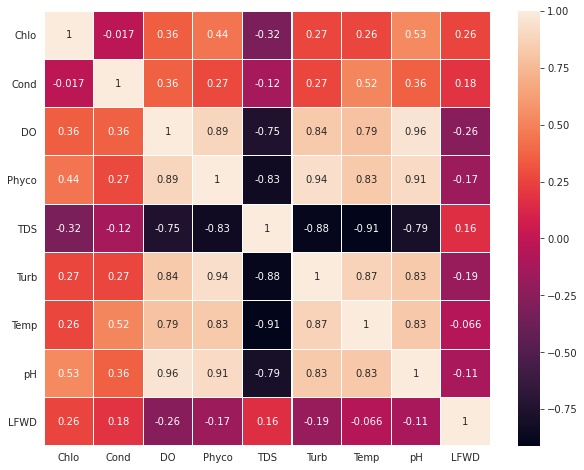

In [13]:
sns.heatmap(data_processed.corr(),annot=True, linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [ ]:
# 表2是该剧集的descriptive statistics，包括count, mean, standard deviation, minimum, maximum和quartile 1-4。Count表明数据集共有2218个样本。另外，可以明显地可以看出AN和Sal字段所有值为0，这些字段无法为模型的训练提供信息，因此直接删除AN和Sal。其实这两个字段为0的现象在很多个数据集中出现，因此在所有数据集中，AN和Sal被决定删除。
# 图5是该数据集的原始plot。纵轴代表water indicator的数值,横轴是按时间排序的样本index。一方面该图可以反映indicator的变化趋势。例如Phyco与Chlo, DO, Temp和pH的变化趋势非常接近，这代表Phyco与这几个indicators具有强的正相关性。值得一提的是，本研究的中期报告关于2021年水质数据的相关性研究结果可以印证比并解释这种正相关性。另一方面，可以看出Cond,TDS,pH和LFWD存在明显的离群值，这些离群值会影响模型准确性。由于离群值数量较少，可以直接用z-score方法删除这些样本。
# 图6是descriptive statistics的plot，相比表2的数值，它可以更直观地看出各个字段的标量和分布差异。根据std可以看出，Chlo, DO, Phyco, Turb和LFWD的离散程度较大；而Cond, TDS, Temp和pH的离散程度较小。另外字段的Scale也存在数量级上的差异，因此模型训练前的Normalization是必要的。
# 经过z-score删除离群值后的结果如表3，图7和图8所示。对比表2和表3，数据量从2218减少至2161，其中有43条包含离群值的记录被删除。AN和Sal两个字段也被直接丢弃。比较图5和图7，在未改变数据形状的前提下，那些明显的离群值已被删除。比较图6和图8，Chlo, DO, Phyco, Turb and LFWD的离散程度也有所减小。

# 处理好离群点后，特征之间的相关性被检查（图9）。中期报告中已经计算了Phyco与Chlo, DO, pH和Temp之间的相关性，并对导致这些结果的原因进行了分析与讨论。其余特征之间的相关性讨论会在Chapter5中进行阐述与分析。原则上，基于相关性的特征选择应被用于eliminate redundant features，但由于不同数据集上特征之间的相关性差异很大，我们决定保留所有的特征以保证模型的泛化能力。

In [5]:
import numpy as np
def multi_barplot():
    omae_train = [0.618, 0.626, 1.288, 0.397, 0.997, 2.822, 7.451, 18.196]
    omae_test = [4.535, 2.106, 4.181, 1.383, 1.530, 8.724, 12.597, 12.386]
    ormse_train = [0.822, 0.855, 2.249, 1.012, 1.383, 3.685, 10.383, 21.506]
    ormse_test = [5.043, 2.303, 5.707, 2.117, 2.195, 9.839, 16.300, 15.159]
    or2_train = [0.918, 0.829, 0.541, 0.712, 0.918, 0.749, 0.950, 0.843]
    or2_test = [-1.367, -2.541, 0.319, 0.593, 0.794, 0.387, 0.532, 0.872]
    mae_train = [0.617, 0.705,1.051,0.309,0.823,1.319,6.608,14.919]
    mae_test = [2.429,1.000,3.676,3.280,1.003,7.808,11.088,7.802]
    rmse_train = [0.852,0.816,2.163,0.917,1.182,2.123,9.357,17.170]
    rmse_test = [3.224,1.267,4.162,1.809,1.950 ,8.919,15.666,10.826]
    r2_train = [0.933,0.816, 0.546,0.961,0.968,0.892,0.949,0.889]
    r2_test = [-0.075,0.773,0.388,0.806,0.941,0.546,0.704,0.961]
    # omae_train = [14.976,1.384,4.654,2.231, 3.315,3.877,10.902]
    # omae_test = [ 48.808,4.154,15.408,31.715,11.408,20.580, 34.142]
    # ormse_train = [17.742,1.981,7.469,5.844,6.171,6.319,14.657]
    # ormse_test = [ 64.747,5.443,17.776,35.402,15.663,25.796,39.031]
    # or2_train = [0.922,0.942 ,0.867, 0.282 ,0.696,0.928,0.831]
    # or2_test = [-5.385,-0.423,-0.378,-2.351,0.562,0.167, -0.131]
    #
    # mae_train = [13.265,1.226,4.313,2.152,3.185,3.241,7.746]
    # mae_test = [26.375,4.338,13.523 ,12.273, 10.320,8.843,17.934]
    # rmse_train = [16.527,1.525,7.842,5.817,5.235,6.077,9.839]
    # rmse_test = [30.813,5.165 ,16.971,17.242,14.059,10.718,21.367]
    # r2_train = [0.918, 0.944,0.812,0.972, 0.810,0.969,0.922]
    # r2_test = [0.817,0.716,0.611,0.129,0.777 ,0.839,0.628]

    length = len(omae_test)
    x = np.arange(length)
    dates = ['dushu-20220522_20220610','dushu-20220701_20220708','dushu-20220715_20220720','dushu-20220722_20220726','dushu-20220803_20220809','dushu-20220815_20220824','dushu-20220906_20220909','dushu-20220923_20220927']

    datesj = ['jinji-20220505\_20220526','jinji-20220701\_20220714','jinji-20220720\_20220722','jinji-20220726\_20220803','jinji-20220809\_20220824','jinji-20220831\_20220906','jinji-20220909\_20220923']

    plt.figure(figsize=(20, 4))
    total_width, n = 0.8, 4
    width = total_width / n
    x1 = x - width / 4
    x2 = x1 + width
    x3 = x2 + width + 0.05
    x4 = x3 + width

    plt.subplot(1, 4, 1)
    plt.title('Training MAE and RMSE')
    plt.ylabel('million/L')
    plt.bar(x1, omae_train, width=width, label='MAE with outliers')
    plt.bar(x2, mae_train, width=width, label='MAE without outliers')
    plt.bar(x3, ormse_train, width=width, label='RMSE with outliers')
    plt.bar(x4, rmse_train, width=width, label='RMSE without outliers')
    plt.xticks(x, datesj, rotation=90)
    plt.legend()

    plt.subplot(1, 4, 2)
    plt.title('Testing MAE and RMSE')
    plt.ylabel('million/L')
    plt.bar(x1, omae_test, width=width, label='MAE with outliers')
    plt.bar(x2, mae_test, width=width, label='MAE without outliers')
    plt.bar(x3, ormse_test, width=width, label='RMSE with outliers')
    plt.bar(x4, rmse_test, width=width, label='RMSE without outliers')
    plt.xticks(x, datesj, rotation=90)
    plt.legend()

    plt.subplot(1, 4, 3)
    plt.title('Training R2')
    plt.ylabel('R2 score')
    plt.bar(x1, or2_train, width=width, label='R2 with outliers')
    plt.bar(x2, r2_train, width=width, label='R2 without outliers')
    plt.xticks(x, datesj, rotation=90)
    plt.legend()

    plt.subplot(1, 4, 4)
    plt.title('Testing R2')
    plt.ylabel('R2 score')
    plt.bar(x1, or2_test, width=width, label='R2 with outliers')
    plt.bar(x2, r2_test, width=width, label='R2 without outliers')
    plt.xticks(x, datesj, rotation=90)
    plt.legend()

    plt.savefig('/home/weiyichen/桌面/performance_dushu.png', bbox_inches= 'tight')
    plt.close()
multi_barplot()